<h2>Index</h2>
<ul>    
    <li><a href="#1D_Tensors"> 1D Tensors</a></li>
    <li><a href="#2D_Tensors"> 2D Tensors</a></li>
    <li><a href="#Derivates"> Derivates</a></li>
    <li><a href="#DataSets"> DataSets</a></li>
</ul>
<br>

<h1>Import these libraries</h1>

In [ ]:
import numpy as np
import pandas as pd

import torch

# Plotting functions
import matplotlib.pyplot as plt
%matplotlib inline


from torch.utils.data import Dataset
torch.manual_seed(1)

from torchvision import transforms

<h1 id="1D_Tensors">1D Tensors</h1>



<h2>Types and Shape</h2>

In [ ]:
# -- INT -----------------------------------------------------------------------
tens_0=torch.tensor([0, 1, 2, 3, 4])

print("dtype: {}\ttype:{}".format(tens_0.dtype, tens_0.type()))
print("Python type is", type(tens_0))

# -- FLOAT ---------------------------------------------------------------------
tens_1=torch.tensor([1.6, 3.2, 0.1, 4.9])
tens_2=torch.FloatTensor([0, 1, 2, 3, 4]) # from int[] to FloatTensor

print("dtype: {}\ttype:{}".format(tens_1.dtype, tens_1.type()))
print("Python type is {}\n".format(type(tens_1)))

print("dtype: {}\ttype:{}".format(tens_2.dtype, tens_2.type()))
print("Python type is {}\n".format(type(tens_2)))

# -- convert an existing tensor to another type ---------------------------------
new_float_tensor=tens_0.type(torch.FloatTensor)
print("type:", new_float_tensor.type())

dtype: torch.int64	type:torch.LongTensor
Python type is <class 'torch.Tensor'>
dtype: torch.float32	type:torch.FloatTensor
Python type is <class 'torch.Tensor'>

dtype: torch.float32	type:torch.FloatTensor
Python type is <class 'torch.Tensor'>

type: torch.FloatTensor


<b>WARNING: The elements of a list that will be converted to a tensor need to be of the same type.</b>

<h2 align="center">Size and Dimension</h2>

In [ ]:
print("Size of 'tens_0':", tens_0.size())
print("Dimension of 'tens_0': {}\n".format(tens_0.ndimension()))

# original size is '5'.
tens_2D_0 = tens_0.view(5, 1)
# using '-1' it is applied to all the numbers of the torch tensor
tens_2D_1 = tens_0.view(-1, 1)
print("tens_0: {}\tsize: {}".format(tens_0, tens_0.size()))
print("tens_2D_0: {}\tsize: {}".format(tens_2D_0, tens_2D_0.size()))
print("tens_2D_1: {}\tsize: {}".format(tens_2D_1, tens_2D_1.size()))

Size of 'tens_0': torch.Size([5])
Dimension of 'tens_0': 1

tens_0: tensor([0, 1, 2, 3, 4])	size: torch.Size([5])
tens_2D_0: tensor([[0],
        [1],
        [2],
        [3],
        [4]])	size: torch.Size([5, 1])
tens_2D_1: tensor([[0],
        [1],
        [2],
        [3],
        [4]])	size: torch.Size([5, 1])


<h2 align="center">Convertions</h2>

In [ ]:
# -- NUMPY ---------------------------------------------------------------------
np_array = np.array([1.6, 3.2, 0.1, 4.9])
np_to_tens = torch.from_numpy(np_array)

print("np_to_tens: {}\tdtype: {}\n".format(np_to_tens, np_to_tens.dtype))

tens_to_np = np_to_tens.numpy()
print("tens_to_np: {}\tdtype: {}\n".format(tens_to_np, tens_to_np.dtype))

# WARNING: both objects are pointing to 'np_array'.
# If we change tha values. the values in the objects are also changed.
np_array[:]=-1
print("np_to_tens: {}".format(np_to_tens))
print("tens_to_np: {}\n".format(tens_to_np))

# -- PANDAS --------------------------------------------------------------------
pandas=pd.Series([1.6, 3.2, 0.1, 4.9])
pandas_to_tens=torch.from_numpy(pandas.values)

print("pandas_to_tens: ", pandas_to_tens)
print("dtype: {}\t type: {}".
      format(pandas_to_tens.dtype, pandas_to_tens.type()))



np_to_tens: tensor([1.6000, 3.2000, 0.1000, 4.9000], dtype=torch.float64)	dtype: torch.float64

tens_to_np: [1.6 3.2 0.1 4.9]	dtype: float64

np_to_tens: tensor([-1., -1., -1., -1.], dtype=torch.float64)
tens_to_np: [-1. -1. -1. -1.]

pandas_to_tens:  tensor([1.6000, 3.2000, 0.1000, 4.9000], dtype=torch.float64)
dtype: torch.float64	 type: torch.DoubleTensor


<h2 align="center">Indexing</h2>

In [ ]:
# A tensor for showing how the indexs work on tensors

tens_0=torch.tensor([0, 1, 2, 3, 4])
print("Index 1.  ==>  tensor value: {}\tpython value: {}\n".
      format(tens_0[1], tens_0[1].item()))

# Assign '-50' on index 0
tens_0[4]=-50
print("tens_0: {}\n".format(tens_0))

# change indexes at the same time
print("tens_0: {}".format(tens_0))
indexes=[1,3]
tens_0[indexes]=0
print("tens_0: {}\n".format(tens_0))

# -- Slicing -------------------------------------------------------------------
tens_0_set=tens_0[1:4]

print("tens_0_set: {}\n".format(tens_0_set))

tens_0[0:2] = torch.tensor([111, 321])
print("tens_0: {}\n".format(tens_0))




Index 1.  ==>  tensor value: 1	python value: 1

tens_0: tensor([  0,   1,   2,   3, -50])

tens_0: tensor([  0,   1,   2,   3, -50])
tens_0: tensor([  0,   0,   2,   0, -50])

tens_0_set: tensor([0, 2, 0])

tens_0: tensor([111, 321,   2,   0, -50])



<h2 align="center"> Operations</h2>

In [ ]:
u=torch.tensor([2,4])
v=torch.tensor([10,1])

# -- Adition -------------------------------------------------------------------
add=u+v
print("(+)\t",add)

# scalar
add_scalar=u+1
print("(scalar) {}\n".format(add_scalar))

# -- Subtraction ---------------------------------------------------------------
sub=u-v
print("(-)\t",sub)

# -- Multiplication ------------------------------------------------------------
mul=u*v
print("(*)\t",mul)

# -- Division ------------------------------------------------------------------
div=u/v
print("(/)\t{}\n".format(div))

# -- Dot product ---------------------------------------------------------------
dot=torch.dot(u,v)
print("(Dot)\t", dot)
#2*10 + 4*1 = 24

(+)	 tensor([12,  5])
(scalar) tensor([3, 5])

(-)	 tensor([-8,  3])
(*)	 tensor([20,  4])
(/)	tensor([0.2000, 4.0000])

(Dot)	 tensor(24)


<h2 align="center"> Functions </h2>

In [ ]:
tens_1=torch.tensor([1.6, 3.2, 0.1, 4.9])
print(tens_1,"\n")

# -- Max/Min -------------------------------------------------------------------
max_v=tens_1.max()
min_v=tens_1.min()
print("Max: {}\tMin: {}\n".format(max_v, min_v))

# -- Mean ----------------------------------------------------------------------
mean=tens_1.mean()
print("Mean: ", mean)

# -- Standard deviation --------------------------------------------------------
std=tens_1.std()
print("Standard deviation: {}\n".format(mean))


# -- Sin/Cos/Tan ---------------------------------------------------------------
pi_tensor=torch.tensor([0, np.pi/2, np.pi])
sin=torch.sin(pi_tensor)
cos=torch.cos(pi_tensor)
tan=torch.tan(pi_tensor)
print("Sin: ", sin)
print("Cos: ", cos)
print("Tan: ", tan)

tensor([1.6000, 3.2000, 0.1000, 4.9000]) 

Max: 4.900000095367432	Min: 0.10000000149011612

Mean:  tensor(2.4500)
Standard deviation: 2.450000047683716

Sin:  tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])
Cos:  tensor([ 1.0000e+00, -4.3711e-08, -1.0000e+00])
Tan:  tensor([ 0.0000e+00, -2.2877e+07,  8.7423e-08])


<h3> Create tensor with <code>torch.linspace()</code></h3>

tens_l5: tensor([-2., -1.,  0.,  1.,  2.])

tensor([ 0.0000,  0.1269,  0.2539,  0.3808,  0.5077,  0.6347,  0.7616,  0.8885,
         1.0155,  1.1424,  1.2693,  1.3963,  1.5232,  1.6501,  1.7771,  1.9040,
         2.0309,  2.1579,  2.2848,  2.4117,  2.5387,  2.6656,  2.7925,  2.9195,
         3.0464,  3.1733,  3.3003,  3.4272,  3.5541,  3.6811,  3.8080,  3.9349,
         4.0619,  4.1888,  4.3157,  4.4427,  4.5696,  4.6965,  4.8235,  4.9504,
         5.0773,  5.2043,  5.3312,  5.4581,  5.5851,  5.7120,  5.8389,  5.9659,
         6.0928,  6.2197,  6.3467,  6.4736,  6.6005,  6.7275,  6.8544,  6.9813,
         7.1083,  7.2352,  7.3621,  7.4890,  7.6160,  7.7429,  7.8698,  7.9968,
         8.1237,  8.2506,  8.3776,  8.5045,  8.6314,  8.7584,  8.8853,  9.0122,
         9.1392,  9.2661,  9.3930,  9.5200,  9.6469,  9.7738,  9.9008, 10.0277,
        10.1546, 10.2816, 10.4085, 10.5354, 10.6624, 10.7893, 10.9162, 11.0432,
        11.1701, 11.2970, 11.4240, 11.5509, 11.6778, 11.8048, 11.9317, 12.05

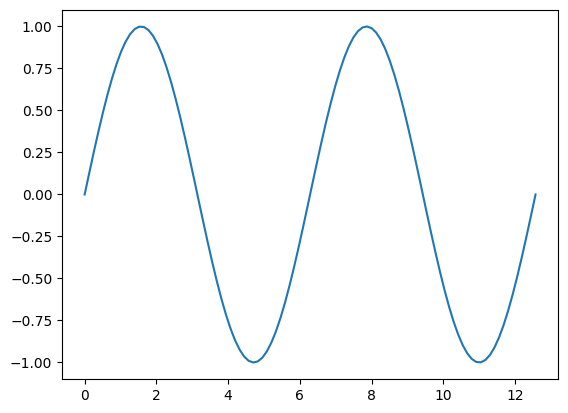

In [ ]:
# evenly spaced numbers in the specify interval
tens_l5 = torch.linspace(-2, 2, steps=5)
print ("tens_l5: {}\n".format(tens_l5))

pi_tensor=torch.linspace(0, 4*np.pi, 100)
sin=torch.sin(pi_tensor)

plt.plot(pi_tensor.numpy(), sin.numpy())
print(pi_tensor)

<h1 id="2D_Tensors">2D Tensors</h1>

In [ ]:
twoD_list=[[0,1,2],[3,4,5],[6,7,8]]
tens_2D=torch.tensor(twoD_list)

print("2D Tensor: {}\n".format(tens_2D))

print("Dimension: ", tens_2D.ndimension())
print("Shape: ", tens_2D.shape)
print("Shape: ", tens_2D.size())
print("Number of elements: ", tens_2D.numel())

2D Tensor: tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

Dimension:  2
Shape:  torch.Size([3, 3])
Shape:  torch.Size([3, 3])
Number of elements:  9


<h2 align="center">Convertions</h2>

In [ ]:

# -- NUMPY ---------------------------------------------------------------------
tens_to_np=tens_2D.numpy()

print("tens_np: {}\tdtype: {}\n".format(tens_to_np, tens_to_np.dtype))

np_to_tensor=torch.from_numpy(tens_to_np)
print("np_to_tensor: {}\tdtype: {}\n".format(np_to_tensor, np_to_tensor.dtype))



# -- PANDAS --------------------------------------------------------------------
# Try to convert the Panda Dataframe to tensor

df=pd.DataFrame({'a':[0,1,2],'b':[3,4,5]})

print("pandas_to_np: ", df.values)
print("Type: {}\n".format(df.values.dtype))


tens_2D_1=torch.from_numpy(df.values)
print("tens_2D_1: ", tens_2D_1)
print("Type: ", tens_2D_1.dtype)



tens_np: [[0 1 2]
 [3 4 5]
 [6 7 8]]	dtype: int64

np_to_tensor: tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])	dtype: torch.int64

pandas_to_np:  [[0 3]
 [1 4]
 [2 5]]
Type: int64

tens_2D_1:  tensor([[0, 3],
        [1, 4],
        [2, 5]])
Type:  torch.int64


<h2 align="Index_Slice">Indexing</h2>


In [ ]:
twoD_list=[[0,1,2],[3,4,5],[6,7,8]]
tens_2D=torch.tensor(twoD_list)

print("[1,2]  :", tens_2D[1, 2])
print("[1][2] : {}\n".format(tens_2D[1][2]))

print("[0, 0:2] :", tens_2D[0, 0:2])
print("[1:3][1] :", tens_2D[1:3][1])

[1,2]  : tensor(5)
[1][2] : 5

[0, 0:2] : tensor([0, 1])
[1:3][1] : tensor([6, 7, 8])


<h2 align="center"> Operations</h2>

In [ ]:
u=torch.tensor([[2,4],[-20,7]])
v=torch.tensor([[10,1],[0,1]])

# -- Adition -------------------------------------------------------------------
add=u+v
print("(+)\t",add)

# scalar
add_scalar=u+1
print("(scalar) {}\n".format(add_scalar))

# -- Subtraction ---------------------------------------------------------------
sub=u-v
print("(-)\t",sub)

# -- Multiplication ------------------------------------------------------------

# Hadamard product corresponds to multiplying each of
# the elements at the same position

mul=u*v
print("(*)\t",mul)

# -- Division ------------------------------------------------------------------
div=u/v
print("(/)\t{}\n".format(div))

(+)	 tensor([[ 12,   5],
        [-20,   8]])
(scalar) tensor([[  3,   5],
        [-19,   8]])

(-)	 tensor([[ -8,   3],
        [-20,   6]])
(*)	 tensor([[20,  4],
        [ 0,  7]])
(/)	tensor([[0.2000, 4.0000],
        [  -inf, 7.0000]])



In [ ]:
mA=torch.tensor([[1, 0, 1], [0, 0, -1]])    # 2x3
mB=torch.tensor([[2, 0], [2, -1], [-1, 1]]) # 3x2

matrix_mul=torch.mm(mA,mB)
print("matrix_mul: ", matrix_mul)

matrix_mul:  tensor([[ 1,  1],
        [ 1, -1]])


<h1 id="Derivates">Derivates</h1>


In [ ]:
# using evaluating functions and derivatives of x using this value of x
x=torch.tensor(2.0, requires_grad = True)
print("Tensor x: {}\n".format(x))

y=x**3
print("y = x^2: ", y)

y.backward() # derivative x^3 = 3x^2 = 3*2^2 = 12
print("Dervative: ", x.grad)

Tensor x: 2.0

y = x^2:  tensor(8., grad_fn=<PowBackward0>)
Dervative:  tensor(12.)


In [ ]:
print("--------- X ---------")
print('data:',x.data)
print("is_leaf:",x.is_leaf) # x is value tensor
print('grad:',x.grad)
print("requires_grad:",x.requires_grad)

print("\n--------- Y ---------")
print('data:',y.data)
print("is_leaf:",y.is_leaf) # x is value tensor
# UserWarning: The .grad attribute of a Tensor that is
# not a leaf Tensor is being accessed.
#print('grad:',y.grad)
print("requires_grad:",y.requires_grad)

--------- X ---------
data: tensor(2.)
is_leaf: True
grad: tensor(12.)
requires_grad: True

--------- Y ---------
data: tensor(8.)
is_leaf: False
requires_grad: True


<h3>Custom autograd Functions</h3>

In [ ]:
class SQ(torch.autograd.Function):

    """
    In the forward pass we receive a Tensor containing the input and return
    a Tensor containing the output.

    Args:
      ctx (context object) : Stash information for backward computation.
      x (float) : number

    Return:
      ret (func) : function
    """
    @staticmethod
    def forward(ctx,x):
        ret=x**3 # the same as the first example
        ctx.save_for_backward(x)
        return ret

    """
    In the backward pass we receive a Tensor containing the gradient of
    the loss with respect to the output.
    And we need to compute the gradient of the loss with respect to the input.

    Args:
      ctx (context object) : Stash information for backward computation.
      grad_output (tensor)

    Return:
      grad_output (tensor)
    """
    @staticmethod
    def backward(ctx, grad_output):
        x,=ctx.saved_tensors
        grad_output=3*(x**2) # derivate
        return grad_output

In [ ]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y.backward()
print("Dervative: ", x.grad)

Dervative:  tensor(12.)


<h3>Partial Derivatives</h3>
Function: $f(u,v)=u*v+u^{4}$

In [ ]:
# f(u, v) = u*v + u^4 (with u=2, v=-1)

u=torch.tensor(2.0,requires_grad=True)
v=torch.tensor(-1.0,requires_grad=True)

f=u*v + u**4
print("f:", f)

# derivative
f.backward()
print("Derivative (u):",u.grad)
print("Derivative (v):",v.grad)

f: tensor(14., grad_fn=<AddBackward0>)
Derivative (u): tensor(31.)
Derivative (v): tensor(2.)


<h3>Multiple values</h3>

In [ ]:
# Calculate the derivative with multiple values

x=torch.linspace(-20, 20, 100, requires_grad = True)
print(x,"\n")

Y=x**2
y=torch.sum(x**2)
print(y)

tensor([-20.0000, -19.5960, -19.1919, -18.7879, -18.3838, -17.9798, -17.5758,
        -17.1717, -16.7677, -16.3636, -15.9596, -15.5556, -15.1515, -14.7475,
        -14.3434, -13.9394, -13.5354, -13.1313, -12.7273, -12.3232, -11.9192,
        -11.5152, -11.1111, -10.7071, -10.3030,  -9.8990,  -9.4949,  -9.0909,
         -8.6869,  -8.2828,  -7.8788,  -7.4747,  -7.0707,  -6.6667,  -6.2626,
         -5.8586,  -5.4545,  -5.0505,  -4.6465,  -4.2424,  -3.8384,  -3.4343,
         -3.0303,  -2.6263,  -2.2222,  -1.8182,  -1.4141,  -1.0101,  -0.6061,
         -0.2020,   0.2020,   0.6061,   1.0101,   1.4141,   1.8182,   2.2222,
          2.6263,   3.0303,   3.4343,   3.8384,   4.2424,   4.6465,   5.0505,
          5.4545,   5.8586,   6.2626,   6.6667,   7.0707,   7.4747,   7.8788,
          8.2828,   8.6869,   9.0909,   9.4949,   9.8990,  10.3030,  10.7071,
         11.1111,  11.5152,  11.9192,  12.3232,  12.7273,  13.1313,  13.5354,
         13.9394,  14.3434,  14.7475,  15.1515,  15.5556,  15.95

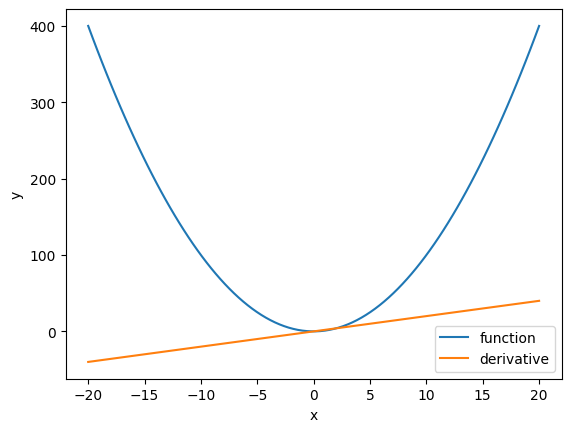

In [ ]:
x=torch.linspace(-20, 20, 100, requires_grad = True)

Y=x**2
y=torch.sum(x**2) # y=x^2

# Plot the function and its derivative

y.backward()

# detach() excludes further tracking of operations in the graph
plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

<h3>ReLu activation function</h3>

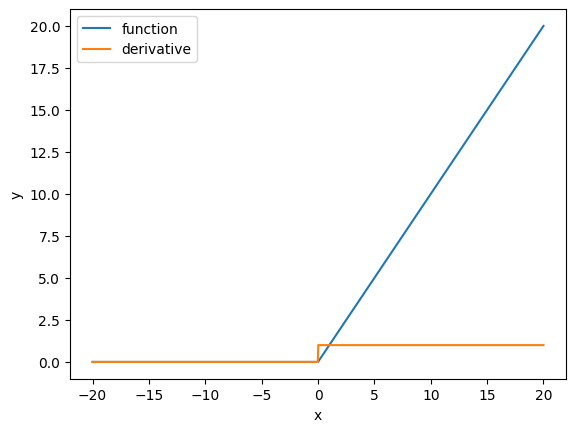

In [ ]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x=torch.linspace(-20, 20, 1000, requires_grad = True)
Y=torch.relu(x)

y=Y.sum()
y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

<h2 id="DataSets">DataSets</h2>

In [ ]:
class example_DataSet(Dataset):

    def __init__(self, length=50, transform=None):
        self.len=length

        # tensor list with 3 tensors of value=4
        self.x =4*torch.ones(length, 3)
        self.y =torch.ones(length, 1)

        self.transform=transform

    """
    Getter.

    Args:
      idx (int) : Index.
    """
    def __getitem__(self, idx):
        ret= self.x[idx], self.y[idx]

        # transform the data
        if self.transform: ret=self.transform(ret)

        return ret

    """Get length"""
    def __len__(self): return self.len

In [ ]:
data_set=example_DataSet(length=50)

print('dataset: ', data_set)
print('Idx 0: ', data_set[0])
print('Length: ', len(data_set))

# The dataset is iterable
"""
idx=0
for x,y in data_set:
    print('{} - x: {}\ty: {}'.format(idx,x,y))
    idx+=1
"""
print('\nThe dataset is iterable')

dataset:  <__main__.example_DataSet object at 0x7ec640fade70>
Idx 0:  (tensor([4., 4., 4.]), tensor([1.]))
Length:  50

The dataset is iterable


<h3> Transforms </h3>

In [ ]:
# Class used to tranform de data. ADDING

class add_trans(object):

    def __init__(self, addx=10):
        self.addx=addx

    """
    Class executor.

    Args:
      sample (AnyType) : Sample of a dataset.

    Return:
      sample (AnyType) : Transformed sample.
    """
    def __call__(self, sample):
        x=sample[0]
        y=sample[1]

        # with this implementation the original dataset also
        # changed while executing the transform class
        #x+=self.addx
        #y+=self.addx

        x=x+self.addx
        y=y+self.addx

        sample=x,y
        return sample

In [ ]:
transform=add_trans(addx=5)
data_set=example_DataSet(length=50)

In [ ]:
for i in range(5):
    x, y  =data_set[i]
    x_,y_ =transform(data_set[i])

    print('Idx: {} - x: {} x_: {}'.format(i,x,x_))

Idx: 0 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])
Idx: 1 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])
Idx: 2 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])
Idx: 3 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])
Idx: 4 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])


The transform class can be applied in the constructor of the DataSet.

The <code>__call()__</code> function use the transform to get the values of the given indices.

In [ ]:
data_set_trans=example_DataSet(transform=transform)

for i in range(5):
    x, y  =data_set[i]
    x_,y_ =data_set_trans[i]

    print('Idx: {} - x: {} x_: {}'.format(i,x,x_))

Idx: 0 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])
Idx: 1 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])
Idx: 2 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])
Idx: 3 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])
Idx: 4 - x: tensor([4., 4., 4.]) x_: tensor([9., 9., 9.])


<h3> Compose (transforms)</h3>

In [ ]:
# Class used to tranform de data. MULTIPLYING

class mul_trans(object):

    def __init__(self, mult=2):
        self.mult=mult

    """
    Class executor.

    Args:
      sample (AnyType) : Sample of a dataset.

    Return:
      sample (AnyType) : Transformed sample.
    """
    def __call__(self, sample):
        x=sample[0]
        y=sample[1]

        # with this implementation the original dataset also
        # changed while executing the transform class
        #x*=self.addx
        #y*=self.addx

        x=x*self.mult
        y=y*self.mult

        sample=x,y
        return sample




In [ ]:
# Combine the add_trans() and mul_trans() transformations

# first add then mul
transforms_list=transforms.Compose([add_trans(), mul_trans()])
print(transforms_list)

Compose(
)


In [ ]:
x,y=data_set[0]
x_,y_=transforms_list(data_set[0])

print('Original -\tx:  {}\t y: {}'.format(x,y))
print('Transformed -\tx_: {}\t y: {}'.format(x_,y_))

Original -	x:  tensor([4., 4., 4.])	 y: tensor([1.])
Transformed -	x_: tensor([28., 28., 28.])	 y: tensor([22.])
